In [1]:
import pandas as pd

import geopandas as gpd
import cartopy
import cartopy.crs as ccrs

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [4]:
allied = pd.read_excel('./resources/dataset/AlliedOffsets_Projects.xlsx')

In [5]:
methods = pd.read_csv('./resources/dataset/Methodologies.csv')

In [11]:
_filter = allied.Methodology.isin(methods.iloc[:, 0])

In [17]:
afolu = allied[_filter]

In [19]:
countries = pd.read_excel('./resources/dataset/Table_Countries.xlsx')

In [20]:
countries

,ISOA3,Name,Region
0,ABW,Aruba,Latin America and Caribbean
1,AFG,Afghanistan,South Asia
2,AGO,Angola,Sub-Saharan Africa
3,AIA,Anguilla,Latin America and Caribbean
4,ALA,Åland Islands,Europe and Central Asia
...,...,...,...
244,WSM,Samoa,East Asia and Pacific
245,YEM,Yemen,Middle East and North Africa
246,ZAF,South Africa,Sub-Saharan Africa
247,ZMB,Zambia,Sub-Saharan Africa


In [24]:
pd.merge(afolu, countries, left_on = 'Country', right_on = 'Name', how='left').to_excel('./AFOLU.xlsx', index=False)

In [4]:
afolu = pd.read_excel('./AFOLU.xlsx')

In [5]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
world[world['iso_a3'] == 'GBR'].to_csv('./UK.csv')

In [6]:
viz = pd.merge(
    world,
    afolu.groupby('ISOA3').agg(RetiredCredit = ('Retired Credits', 'sum')).sort_values('RetiredCredit', ascending=False).head(20),
    left_on = 'iso_a3',
    right_on = 'ISOA3',
    how = 'left'
    )

In [18]:
viz = pd.read_excel('./VIZ.xlsx')

In [22]:
viz = gpd.GeoDataFrame(viz, geometry = gpd.GeoSeries.from_wkt(viz['geometry']))

In [23]:
afolu_point = viz.loc[~viz['RetiredCredit'].isna()]
afolu_point.loc[:, 'geometry'] = afolu_point.centroid

/var/folders/ft/0fx5l6m11jl25p6493qnzjk00000gn/T/ipykernel_49912/2547806580.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  afolu_point.loc[:, 'geometry'] = afolu_point.centroid


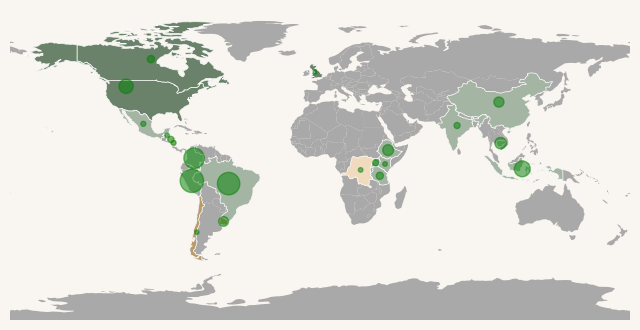

In [33]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='#F9F5F0', subplot_kw={'projection': ccrs.PlateCarree()})
world.plot(ax = ax, color='darkgray')
viz[viz['Tier'] == 1].plot(ax = ax, color='#698269', edgecolor='white', linewidth=0.5, label='Tier 1')
viz[viz['Tier'] == 2].plot(ax = ax, color='#B99B6B', edgecolor='white', linewidth=0.5, label='Tier 2')
viz[viz['Tier'] == 3].plot(ax = ax, color='#a4b5a4', edgecolor='white', linewidth=0.5, label='Tier 3')
viz[viz['Tier'] == 4].plot(ax = ax, color='#F1DBBF', edgecolor='white', linewidth=0.5, label='Tier 4')

ax.add_feature(cartopy.feature.OCEAN, facecolor='#F9F5F0', edgecolor=None)
afolu_point.plot(ax = ax, markersize=afolu_point['RetiredCredit'] / 1.2e5, alpha=0.5, c = 'green')

plt.axis('off')

fig.savefig('./worldplot.svg')

In [82]:
viz[~viz['RetiredCredit'].isna()].sort_values('RetiredCredit', ascending = False).to_excel('./VIZ.xlsx', index=False)

In [97]:
viz.loc[viz['iso_a3'] == 'GBR', 'RetiredCredit'] = 895639.0

In [102]:
clist = [
    'HND', 'NIC', 'COD'
]
viz.loc[viz['iso_a3'].isin(clist), 'Tier'] = 4

In [139]:
viz[~viz['RetiredCredit'].isna()]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,RetiredCredit,Tier
1,5.800546e+07,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",3249175.0,3.0
3,3.758926e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",3312423.0,1.0
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12783464.0,1.0
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",15771977.0,3.0
10,1.895204e+07,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",1140285.0,2.0
11,8.679057e+07,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...",1302432.0,4.0
13,5.257397e+07,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",1324521.0,3.0
27,1.275755e+08,North America,Mexico,MEX,1268870,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",1601258.0,3.0
28,3.461734e+06,South America,Uruguay,URY,56045,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...",5982180.0,2.0
29,2.110495e+08,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",31383692.0,3.0


In [137]:
afolu.groupby('ISOA3').agg(
    RetiredCredit = ('Retired Credits', 'sum'),
    ProjectCount = ('Project', 'count')
    ).sort_values('RetiredCredit', ascending=False).head(40)

,RetiredCredit,ProjectCount
ISOA3,,
PER,34016728.0,26
BRA,31383692.0,84
COL,26323400.0,49
IDN,15771977.0,13
USA,12783464.0,376
KHM,8181639.0,2
ETH,7419085.0,5
CHN,6441082.0,126
URY,5982180.0,12
